In [3]:
import numpy as np

def gaussian_rings(shape, center=None, ring_spacing=10, sigma=2, amplitude=1.0, num_rings=5):
    """
    Generate a 2D array with concentric Gaussian-profile rings.
    
    Parameters:
    - shape: Tuple[int, int], the (height, width) of the array.
    - center: Tuple[float, float], the center of the rings. Defaults to center of the array.
    - ring_spacing: float, distance between the peaks of successive rings.
    - sigma: float, standard deviation of each Gaussian ring.
    - amplitude: float, peak amplitude of each ring.
    - num_rings: int, number of concentric rings.
    
    Returns:
    - 2D NumPy array with Gaussian rings.
    """
    height, width = shape
    if center is None:
        center = (width / 2, height / 2)

    y, x = np.indices(shape)
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)

    result = np.zeros(shape)
    for i in range(1, num_rings + 1):
        ring_radius = i * ring_spacing
        result += amplitude * np.exp(-((r - ring_radius)**2) / (2 * sigma**2))

    return result


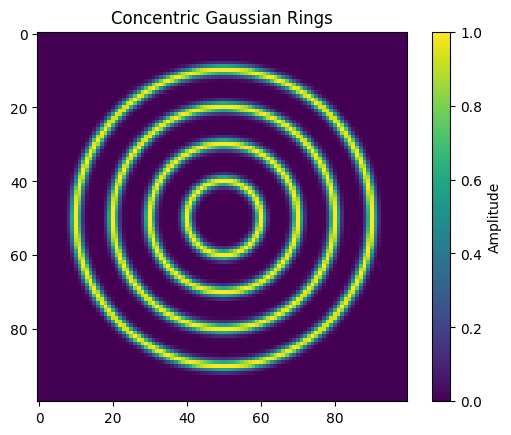

In [4]:
import matplotlib.pyplot as plt

array = gaussian_rings(shape=(100, 100), ring_spacing=10, sigma=1, num_rings=4)
plt.imshow(array, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.title("Concentric Gaussian Rings")
plt.show()


In [5]:
def turbulence_noise2(x,y, N):

    np.random.seed(1)
    r  =lambda: np.random.rand() 

    value = 0
    for ix in range(1,int(N/2)):
        for iy in range(1,int(N/2)):
            value += r() * (np.sin(2*np.pi*ix*(x+r())) * r() * np.sin(2*np.pi*iy*(y+r()))) /(4*np.pi**2*iy*ix )

    return value

In [12]:
def exp_dens(x,y):
    return np.exp(8*np.sin(20*np.pi*x)*np.sin(20*np.pi*y))

In [13]:
import numpy as np

def gaussian_spiral_value(x, y, 
                          a=20.0,         # Spiral tightness (θ = a * r)
                          sigma=0.1,     # Thickness of the spiral
                         ):
    dx = x - 0.5
    dy = y -0.5
    r = np.sqrt(dx**2 + dy**2)
    theta = np.arctan2(dy, dx)

    value = 0 
    if theta < 0:
        theta += 2 * np.pi

    for i in range(4):
        theta += np.pi/2
     
        if r > 0.05 *(i%2) and r<(0.5-0.03*((i+1)%2)):
            theta_spiral = a * r
            dtheta = (theta - theta_spiral + np.pi) % (2 * np.pi) - np.pi
            arc_distance = r * dtheta
            coeff = r if (i % 2 == 1) else (0.5 - r)
            
            value +=  2*coeff * np.exp(-(arc_distance**2) / (2 * sigma**2)/(r+0.05)**2)

    value += np.exp(-500*((r-0.5))**2 / (2 * sigma**2))
    if r<0.001:
        return 1
    else:
        return 1 if value > 1 else value

In [14]:
import numpy as np

def turbulence_noise(x, y, N=32):
    np.random.seed(1)

    I = np.arange(1, int(N / 2))  # shape (M,)
    J = np.arange(1, int(N / 2))  # shape (M,)
    IX, IY = np.meshgrid(I, J, indexing='ij')  # shape (M, M)

    M = len(I)

    rand = np.random.rand(3, M, M)  # three random arrays for each term

    r1 = rand[0]  # multiplier
    r2 = rand[1]  # inside sin(x)
    r3 = rand[2]  # inside sin(y)

    numerator = r1 * (
        np.sin(2 * np.pi * IX * (x + r2)) *
        r3 * np.sin(2 * np.pi * IY * (y + r3))
    )

    denominator = 4 * np.pi**2 * (IX**2 + IY**2)

    value = np.sum(numerator / denominator)

    return value


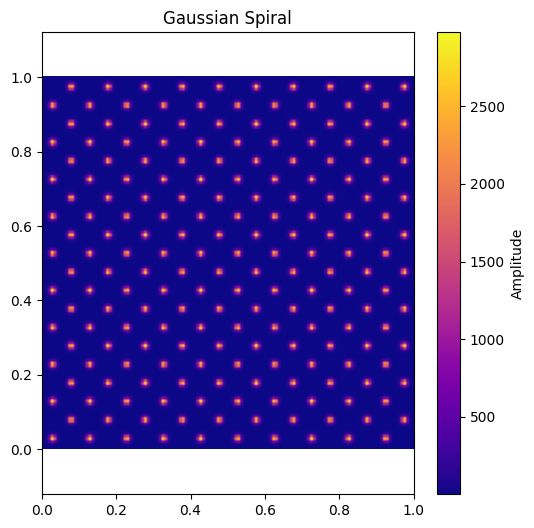

In [16]:
import matplotlib.pyplot as plt

# Create a 2D grid in [0, 1] x [0, 1]
N = 128
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
# Z = np.vectorize(gaussian_spiral_value)(X, Y)
Z = np.vectorize(turbulence_noise)(X, Y,N)
Z = np.vectorize(exp_dens)(X, Y)

# Plot
plt.figure(figsize=(6, 6))
plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap='plasma')
plt.colorbar(label='Amplitude')
plt.title('Gaussian Spiral')
plt.axis('equal')
plt.show()


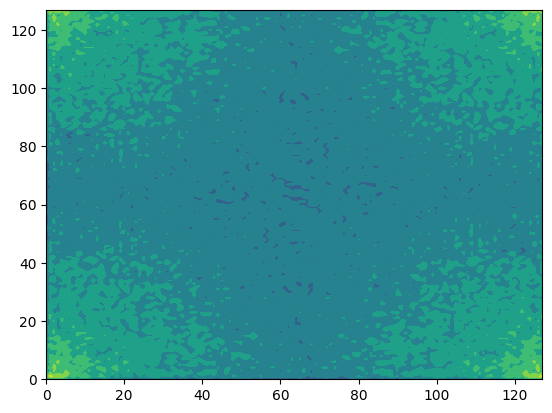

In [ ]:
plt.contourf(np.log(abs(np.fft.fftn(Z))))